<a href="https://colab.research.google.com/github/riyagoyal17/AI-Mafia-Machine-Learning/blob/main/Running_model_for_3_images_hidden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install SSIM-PIL

In [ ]:
pip install pypng

     |████████████████████████████████| 655kB 5.1MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp37-none-any.whl size=67179 sha256=85aba69ec762cc5d10aae3925a5b3af3deb4f39560f0969ee0ff1fac53d24751
  Stored in directory: /root/.cache/pip/wheels/41/6b/ef/0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard
#from keras.engine.topology import Container
from keras.engine.network import Network
from keras.layers import *
from keras import backend
from keras.models import Model,load_model
from keras.preprocessing import image
import keras.backend as K

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import random
import scipy.misc
from tqdm import *
from SSIM_PIL import compare_ssim
from PIL import Image
from google.colab import files
import cv2
import png

In [ ]:
from keras.models import model_from_json
json_file = open('/content/model_for_hiding_3_images.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_for_hiding_3_images.h5")

In [ ]:
inputC = '/content/cover.png'
input1 = '/content/secret1.png'
input2 = '/content/secret2.png'
input3 = '/content/secret3.png' 

imag1 = Image.open(inputC)
new_image = imag1.resize((64,64))
new_image.save('cover_re.png')
inputC = '/content/cover_re.png'

imag1 = Image.open(input1)
new_image = imag1.resize((64,64))
new_image.save('secret1_re.png')
input1 = '/content/secret1_re.png'

imag2 = Image.open(input2)
new_image = imag2.resize((64,64))
new_image.save('secret2_re.png')
input2 = '/content/secret2_re.png'

imag3 = Image.open(input3)
new_image = imag3.resize((64,64))
new_image.save('secret3_re.png')
input3 = '/content/secret3_re.png'


In [ ]:
# Retrieve decoded predictions.
input_S1 = []
input_S2 = []
input_S3 = []
input_C = []

img_i = image.load_img(input1)
x = image.img_to_array(img_i)
input_S1.append(x)

img_i = image.load_img(input2)
x = image.img_to_array(img_i)
input_S2.append(x)

img_i = image.load_img(input3)
x = image.img_to_array(img_i)
input_S3.append(x)

img_i = image.load_img(inputC)
x = image.img_to_array(img_i)
input_C.append(x)

input_C = np.array(input_C)
input_S1 = np.array(input_S1)
input_S2 = np.array(input_S2)
input_S3 = np.array(input_S3)

input_S1 = input_S1/255
input_S2 = input_S2/255
input_S3 = input_S3/255
input_C = input_C/255

print(input_S1.shape)




(1, 64, 64, 3)


In [ ]:
decoded = loaded_model.predict([input_S1,input_S2,input_S3,input_C])
decoded_S1,decoded_S2,decoded_S3,decoded_C = decoded[...,0:3], decoded[...,3:6],decoded[...,6:9],decoded[...,9:12]


In [ ]:
# Get absolute difference between the outputs and the expected values.
diff_S1,diff_S2,diff_S3,diff_C = np.abs(decoded_S1 - input_S1),np.abs(decoded_S2 - input_S2),np.abs(decoded_S3 - input_S3),np.abs(decoded_C - input_C) 

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def show_image(img, n_rows, n_col, idx, gray=False, first_row=False, title=None):
    ax = plt.subplot(n_rows, n_col, idx)
    if gray:
        plt.imshow(rgb2gray(img), cmap = plt.get_cmap('gray'))
    else:
        plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if first_row:
        plt.title(title)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No module named 'pyopencl'
cover :  0.6604942302621458
No module named 'pyopencl'
secret1 :  0.8533486997409147
No module named 'pyopencl'
secret2 :  0.8184341390495709
No module named 'pyopencl'
secret2 :  0.8533486997409147


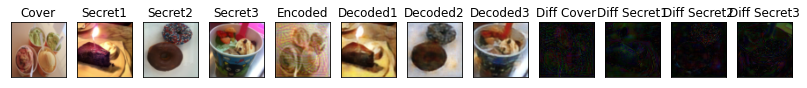

In [ ]:
# Configs for results display

# Show images in gray scale
SHOW_GRAY = False
# Show difference bettwen predictions and ground truth.
SHOW_DIFF = True

# Diff enhance magnitude
ENHANCE = 1

# Number of secret and cover pairs to show.
n = 6

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def show_image(img, n_rows, n_col, idx, gray=False, first_row=False, title=None):
    ax = plt.subplot(1, n_col, idx)
    if gray:
        plt.imshow(rgb2gray(img), cmap = plt.get_cmap('gray'))
    else:
        plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if first_row:
        plt.title(title)

plt.figure(figsize=(14, 15))
rand_indx = [random.randint(0, 2) for x in range(1)]
# for i, idx in enumerate(range(0, n)):
for i, idx in enumerate(range(1)):
    n_col = 12 if SHOW_DIFF else 8
    
    show_image(input_C[idx], n, n_col, i * n_col + 1, gray=SHOW_GRAY, first_row=i==0, title='Cover')

    show_image(input_S1[idx], n, n_col, i * n_col + 2, gray=SHOW_GRAY, first_row=i==0, title='Secret1')

    show_image(input_S2[idx], n, n_col, i * n_col + 3, gray=SHOW_GRAY, first_row=i==0, title='Secret2')

    show_image(input_S3[idx], n, n_col, i * n_col + 4, gray=SHOW_GRAY, first_row=i==0, title='Secret3')
    
    show_image(decoded_C[idx], n, n_col, i * n_col + 5, gray=SHOW_GRAY, first_row=i==0, title='Encoded')
    
    show_image(decoded_S1[idx], n, n_col, i * n_col + 6, gray=SHOW_GRAY, first_row=i==0, title='Decoded1')

    show_image(decoded_S2[idx], n, n_col, i * n_col + 7, gray=SHOW_GRAY, first_row=i==0, title='Decoded2')

    show_image(decoded_S3[idx], n, n_col, i * n_col + 8, gray=SHOW_GRAY, first_row=i==0, title='Decoded3')

    
    if SHOW_DIFF:

      show_image(np.multiply(diff_C[idx], ENHANCE), n, n_col, i * n_col + 9, gray=SHOW_GRAY, first_row=i==0, title='Diff Cover')
        
      show_image(np.multiply(diff_S1[idx], ENHANCE), n, n_col, i * n_col + 10, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret1')

      show_image(np.multiply(diff_S2[idx], ENHANCE), n, n_col, i * n_col + 11, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret2')

      show_image(np.multiply(diff_S3[idx], ENHANCE), n, n_col, i * n_col + 12, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret3')

    cover = Image.fromarray((input_C[idx] * 255).astype(np.uint8))
    cover_decode = Image.fromarray((decoded_C[idx] * 255).astype(np.uint8))
    valuec = compare_ssim(cover,cover_decode ) # Compare images using OpenCL by default
    print("cover : ",valuec)

    secret = Image.fromarray((input_S1[idx] * 255).astype(np.uint8))
    secret_decode = Image.fromarray((decoded_S1[idx] * 255).astype(np.uint8))
    values = compare_ssim(secret,secret_decode ) # Compare images using OpenCL by default
    print("secret1 : ",values)

    secret = Image.fromarray((input_S2[idx] * 255).astype(np.uint8))
    secret_decode = Image.fromarray((decoded_S2[idx] * 255).astype(np.uint8))
    values = compare_ssim(secret,secret_decode ) # Compare images using OpenCL by default
    print("secret2 : ",values)

    secret = Image.fromarray((input_S1[idx] * 255).astype(np.uint8))
    secret_decode = Image.fromarray((decoded_S1[idx] * 255).astype(np.uint8))
    values = compare_ssim(secret,secret_decode ) # Compare images using OpenCL by default
    print("secret2 : ",values)


plt.savefig("output all.png")
#files.download("output all.png") 
plt.show()

In [ ]:
plt.imshow(input_C[0])
plt.savefig("input_C[0].png")
#files.download("input_C[0].png")

In [ ]:
plt.imshow(input_S1[0])
plt.savefig("input_S1[0].png")
#files.download("input_S1[0].png")

In [ ]:
plt.imshow(input_S2[0])
plt.savefig("input_S2[0].png")
#files.download("input_S2[0].png")

In [ ]:
plt.imshow(input_S3[0])
plt.savefig("input_S3[0].png")
#files.download("input_S3[0].png")

In [ ]:
plt.imshow(decoded_C[0])
plt.savefig("decoded_C[0].png")
#files.download("decoded_C[0].png")

In [ ]:
plt.imshow(decoded_S1[0])
plt.savefig("decoded_S1[0].png")
#files.download("decoded_S1[0].png")

In [ ]:
plt.imshow(decoded_S2[0])
plt.savefig("decoded_S2[0].png")
#files.download("decoded_S2[0].png")

In [ ]:
plt.imshow(decoded_S3[0])
plt.savefig("decoded_S3[0].png")
#files.download("decoded_S3[0].png")